# Forming clusters


Initial idea is to cluster all the stands according to their similarity and then to form own surrogate for every cluster. That of course rises somes questions:
- what is the similarity measure?
- what is good cluster size?
- how do use surrogates in the end?

Because clusters and then also surrogates must be created automatically we need some way to measure and compare different clusterings and surrogates. Best way to do that would be feeding the right away in to the optimization and then see how they compare between each other and the solution in the paper. Then we just would need the optimization procedure first.

Would it be possible to make a neural network out of the entire problem, so that input would be the same than with the optimization problems already formulated and the output as all the objective functions?


So actually we just would be writing the entire problem again...

But if we input there all the optimun set of all the objective functions and great number of other solutions, would we get out something useful and maybe unexpected?

At least it could be worth trying!

In [1]:
len(str(7**29666))


25071

At least there is a possibility to generate quite big datasets (number before is the length of number of possible combinations)

#### Back to reality

Even though all the previous ideas would be great to try some day, after talking with Jussi it's maybe still a better idea to just form the cluster surrogate and always choose one (virtual) sample to represent entire cluster in the optimization. That way the optimization doesn't have to be altered much and I can focus more on just executing. So clustering it is!

## Hierarchical clustering

In [11]:
 %matplotlib inline
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

In [3]:
data_dir = os.path.join(os.getcwd(), '../boreal_data')

carbon = pd.read_csv(os.path.join(data_dir, 'Carbon_storage.csv'))
HA = pd.read_csv(os.path.join(data_dir, 'Combined_HA.csv'))
deadwood = pd.read_csv(os.path.join(data_dir, 'Deadwood_volume.csv'))
revenue = pd.read_csv(os.path.join(data_dir, 'Timber_revenues.csv'))

In [6]:
X1 = carbon.copy()
X1[carbon.isnull()] = np.nanmin(carbon.values) - 1

In [7]:
Z100 = linkage(X1[:100], 'ward')

In [14]:
c100, coph_dists = cophenet(Z100, pdist(X1[:100]))
c100

0.81172803398053528

Cophenet distance is quite close to 1 so there is no need to be worried (?)

Populating the interactive namespace from numpy and matplotlib


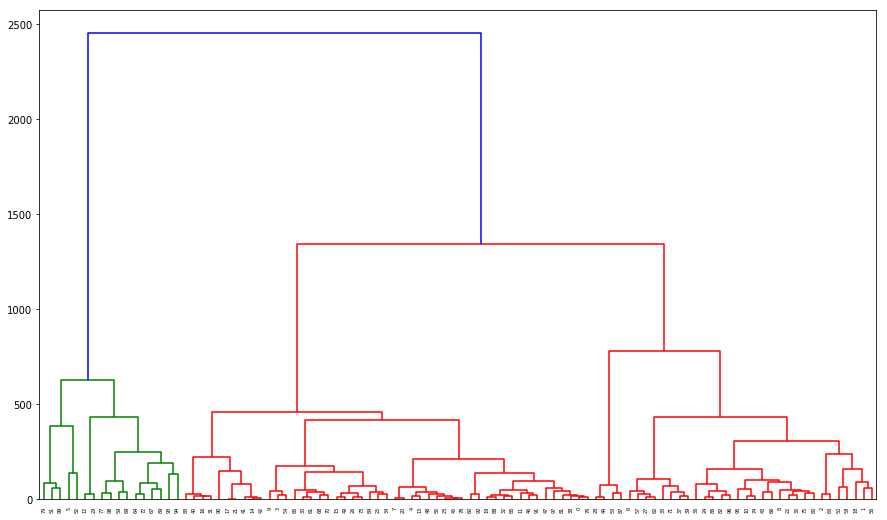

In [28]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)
plt.figure()
dendrogram(Z100)
plt.show()

Okay, this works with small data


Now question: What is this green cluster?!

In [29]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z100, 2000,criterion='distance')
clusters

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 1], dtype=int32)

In [31]:
carbon[:100][clusters==2]

,BAU,SA,EXT10,EXT30,GTR30,NTSR,NTLR
0,20.59810,30.77170,24.5489,26.58910,21.00240,20.17520,28.13860
1,109.72800,165.39500,129.1200,161.09200,110.46100,96.99500,123.90600
2,122.75100,173.19000,122.9450,122.94500,122.75100,173.19000,NaN
3,78.43020,100.28600,78.2663,78.26630,78.43040,100.28600,NaN
4,17.38460,15.41830,NaN,NaN,NaN,15.41830,NaN
6,109.46900,219.17400,103.4090,163.63200,129.24200,111.70200,111.70200
7,26.72850,31.63460,NaN,NaN,NaN,31.63460,NaN
8,71.21670,155.58800,87.6693,125.77400,71.82010,82.66920,106.43300
9,59.07940,78.81160,58.9734,58.97340,59.08010,78.81160,NaN
10,80.64160,198.01100,86.8914,152.50400,81.45170,77.69080,77.69080


In [32]:
carbon[:100][clusters==1]

,BAU,SA,EXT10,EXT30,GTR30,NTSR,NTLR
5,222.862,360.422,269.992,295.745,227.442,259.693,360.422
12,195.876,268.119,213.435,213.435,196.702,268.119,NaN
29,207.918,285.488,209.129,209.129,207.920,285.488,NaN
51,205.534,520.347,237.418,395.470,230.274,210.962,210.962
52,239.879,410.948,291.721,292.690,242.516,373.700,410.948
59,183.898,446.798,202.142,336.788,207.034,188.731,188.731
64,154.223,371.349,163.793,276.268,178.889,157.628,157.628
67,155.318,322.258,147.965,243.973,159.277,142.963,142.963
69,178.358,419.537,191.450,315.521,209.302,183.490,183.490
72,172.812,368.582,171.997,282.013,160.397,160.402,160.402


At least there is less Nan:s in first cluster, but there is still no clear division between nan:s and non-nan:s

There is just one problem: now we assigned Nan-values to be smalles value - 1. This means Nan:s are not a big difference when compared to other values in the dataset -> 

In [23]:
np.nanmin(carbon.values)

0.52839099999999994

In [24]:
np.nanmax(carbon.values)

2059.9899999999998

As we can see, differences between 'valid' data points are much greater than between 'valid' points and points with Nan-values. So it would make sense to assign much different values for Nan:s. That would also automatically connect all the Nan-including lines to the same clusters. Of course another option is to run this clustering separately for all the lines with Nan:s and all the lines without Nan:s. I am just not sure if assigning greatly different values is more efficient or more general than doing this separately. This should be studied!